# NLP Challenge: IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis

## By Duc Nguyen Minh

# Part 1:

###  Sentiment analysis with the IMDB Dataset of 50K Movie Reviews
Starting our journey in Natural Language Processing (NLP), we turn our attention to sentiment analysis. This tool is key for digging into the wealth of information hidden in text, like the vast collection of movie reviews in the IMDB dataset. With 50,000 reviews ready for both learning and testing, we're setting out to distinguish between positive and negative sentiments.

Our adventure will cover a range of models, from well-known ones like Logistic Regression and Support Vector Machines (SVM) to newer technologies such as BERT (Bidirectional Encoder Representations from Transformers) and group strategies like Random Forest and XGBoost. Each model gives us a different way to look at our data, offering clues about how words and phrases signal good or bad reviews.

A crucial step in our process is thorough Exploratory Data Analysis (EDA), where we'll dig into the data to spot trends and patterns. This will help shape how we prepare the data and adjust features for better results. We'll measure our success using metrics like accuracy, precision, recall, and the F1 score. These will not only show how well our models perform but will also help us deeply understand what each model can and can't do.

Through this work, we aim to push the conversation about sentiment analysis forward within the NLP field and uncover new directions for research. We hope to find valuable insights that reach beyond just this dataset.

In our sentiment analysis project focusing on the IMDB movie reviews dataset, we're leveraging a suite of Python libraries to navigate through various stages of the machine learning pipeline. Here's a quick rundown:

NumPy: For handling numerical operations with arrays.
Pandas: Crucial for data manipulation and structured data analysis.
OS: Useful for file operations and interacting with the operating system.
RE: Aids in string searching and manipulation through regular expressions.
String: Provides utilities for standard string processing.
Scikit-learn: Offers comprehensive tools for machine learning, including data splitting, model evaluation metrics, and TF-IDF vectorization, along with several classification models like Logistic Regression and SVC.
XGBoost: Enhances model performance through optimized distributed gradient boosting.
Matplotlib: Enables the creation of visualizations to explore and present data insights.

These libraries collectively form the backbone of our project, supporting everything from data preprocessing and feature extraction to model training, evaluation, and visualization.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%ls

'IMDB Dataset.csv'
'NLP Challenge IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis.ipynb'


In [3]:
%cd drive/MyDrive/Colab Notebooks/IMDB-Dataset-of-50K-Movie-Reviews

/content/drive/MyDrive/Colab Notebooks/IMDB-Dataset-of-50K-Movie-Reviews


In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

The code snippet is a Python function called remove_html_tags designed to cleanse a given text string of any HTML tags. It employs regular expressions to execute two main tasks: first, it substitutes HTML line break tags (<br>, <br />, etc.) with spaces to maintain the separation of words; then, it removes all remaining HTML tags by matching anything that falls within < and > characters. Matches for line breaks are replaced with a space, while other tags are removed completely, resulting in a 'clean' text string devoid of HTML markup. This cleaning process is vital for text analysis, ensuring the data is free from HTML tags that could disrupt further processing.

In [6]:
# Define a function to remove HTML tags from the reviews
def remove_html_tags(text):
    # Replace HTML line break tags with spaces to maintain word separation
    # The regex pattern '<br\s*/?>' matches variations of the line break tag
    # including '<br>', '<br />', and '<br/>', among others.
    # The '\s*' part allows for any number of spaces within the tag,
    # and '/?>' matches both the optional closing slash and the tag end.
    clean_text = re.sub(r'<br\s*/?>', ' ', text)

    # Remove all other HTML tags from the text
    # The regex pattern '<.*?>' is a non-greedy match for any characters
    # starting with '<' and ending with '>', effectively matching HTML tags.
    # It replaces found HTML tags with an empty string, removing them.
    # The '.*?' ensures the shortest match, preventing overreach across multiple tags.
    clean_text = re.sub(r'<.*?>', '', clean_text)

    # Return the text with HTML tags removed
    return clean_text


In [7]:
# Load the dataset (Change the path if necessary when not running on Kaggle)
df = pd.read_csv(r'IMDB Dataset.csv')

In [8]:
print(df.head(5))
df.info()

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#  Data Preprocessing
The code performs several key preprocessing steps on a dataset of reviews to prepare it for sentiment analysis:

Remove Duplicates: It first eliminates any duplicate entries to ensure each review is unique, helping to prevent bias in the analysis.
Convert Sentiment Labels: Sentiments expressed as text ('positive', 'negative') are converted to numerical values (e.g., 1, 0) using LabelEncoder, making the data suitable for machine learning models.
Standardize Text: All review texts are converted to lowercase and cleaned of HTML tags to create a consistent format. Lowercasing ensures uniformity, while removing HTML tags eliminates irrelevant markup from the analysis.
Remove Punctuation: Finally, punctuation is stripped from the reviews to reduce noise, focusing on the textual content that contributes to sentiment.
This preprocessing streamlines the dataset, enabling more effective sentiment analysis by focusing on the textual content most relevant to understanding sentiments.

In [9]:
# Data Preprocessing

# Remove duplicates from the DataFrame to ensure each review is unique,
# preventing any bias towards repeated reviews in our analysis.
df = df.drop_duplicates()

# Convert sentiment labels (e.g., 'positive', 'negative') to numerical values (e.g., 1, 0)
# This conversion is necessary as machine learning models require numerical input.
# LabelEncoder is used here to transform the sentiment labels into integers.
df['sentiment'] = LabelEncoder().fit_transform(df['sentiment'])

# Lowercase all text in the 'review' column to standardize the data,
# ensuring that the same words in different cases are treated as the same word.
# Additionally, apply the 'remove_html_tags' function to each review to clean HTML tags.
# This is important as HTML tags are not relevant to sentiment analysis and can
# interfere with text processing.
df['review'] = df['review'].str.lower().apply(remove_html_tags)

# Remove all punctuation from the reviews.
# Punctuation marks are typically not useful for sentiment analysis and can be
# considered noise in the text. Removing them simplifies the dataset,
# making it more uniform and easier to process.
# The 'translate' method is used here with a translation table that maps
# punctuation marks to None (effectively deleting them).
df['review'] = df['review'].str.translate(str.maketrans('', '', string.punctuation))



<ipython-input-9-f1f44823520a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = LabelEncoder().fit_transform(df['sentiment'])


In [10]:
print(df.head(5))

                                              review  sentiment
0  one of the other reviewers has mentioned that ...          1
1  a wonderful little production   the filming te...          1
2  i thought this was a wonderful way to spend ti...          1
3  basically theres a family where a little boy j...          0
4  petter matteis love in the time of money is a ...          1


In [11]:
# Split data into training and testing sets

# Extract 'review' column as the input features (X) for the model.
# These are the cleaned and preprocessed textual reviews that will be used
# to train the model to recognize sentiment.
X = df['review']

# Extract 'sentiment' column as the target variable (y) for the model.
# These are the numerical sentiment labels that the model will attempt to predict,
# corresponding to the sentiment expressed in each review.
y = df['sentiment']

# Use the train_test_split function to divide the data into training and testing sets.
# - The training set (X_train, y_train) is used to train the model.
# - The testing set (X_test, y_test) is used to evaluate the model's performance.
# The 'test_size=0.2' parameter specifies that 20% of the data should be reserved
# for testing, with the remaining 80% used for training.
# The 'random_state=42' parameter ensures reproducibility of the split by fixing
# the seed for the random number generator used to select records for each set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Explanation of the Visualizations:
Sentiment Distribution: This bar chart provides a straightforward comparison between the number of positive and negative reviews in the dataset. A balanced chart suggests that the dataset is well-suited for binary classification tasks, as the model has an equal amount of examples from each class to learn from. If the distribution is significantly imbalanced, it might influence the model training process, possibly requiring techniques to handle imbalance.

Review Length Distribution: The histogram of review lengths shows how short or long the reviews tend to be, with the x-axis representing the length of reviews and the y-axis showing how many reviews fall into each length interval. Understanding this distribution is crucial for setting parameters in the NLP pipeline, such as the maximum sequence length for models like BERT. It also helps in identifying outliers (extremely short or long reviews) that might need special handling during preprocessing.

These visualizations are fundamental for gaining insights into the dataset and guiding the preprocessing and modeling steps in NLP tasks.

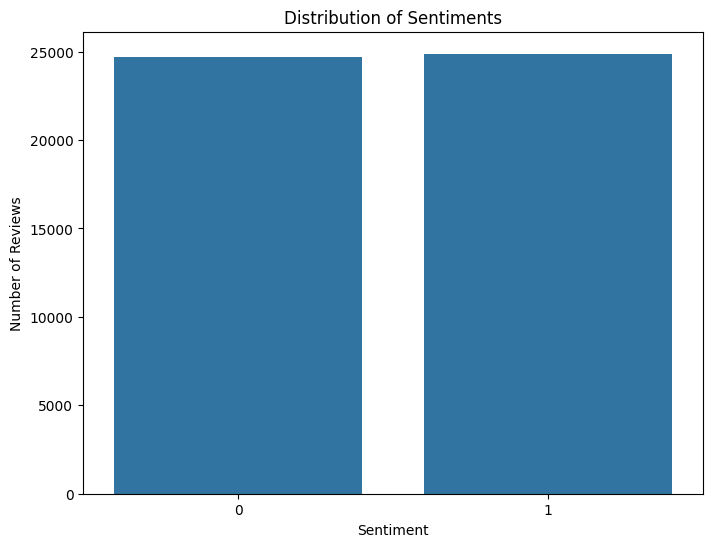

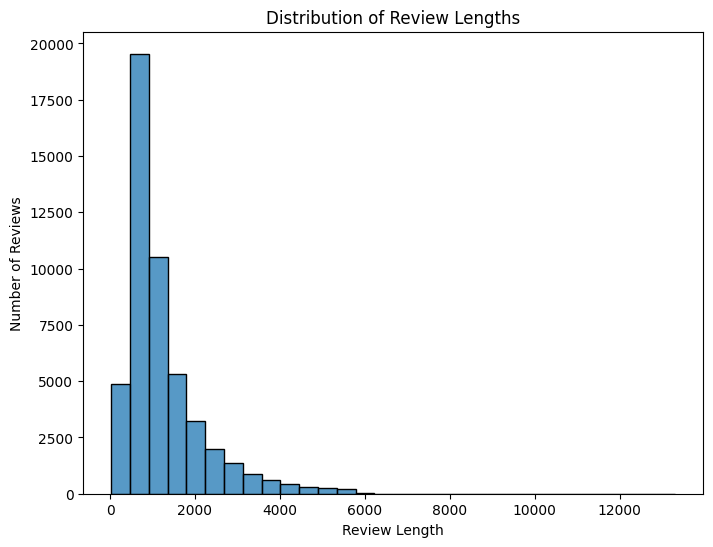

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Review Length Distribution
review_lengths = df['review'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(review_lengths, bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()


# Model Training and Evaluation


This section of code prepares the input data for modeling by converting the raw text into numerical data that reflects not only the presence of words but also their importance in the documents, using the TF-IDF scheme.

In [13]:
# TF-IDF Vectorization

# Initialize the TfidfVectorizer with a maximum of 5000 features.
# TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.
# - 'max_features=5000' limits the number of features (vocabulary) that the vectorizer will learn.
# It prioritizes the top 5000 terms by term frequency across the corpus.
# This can help improve efficiency and manageability of the data, focusing on the most relevant words.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer to the training data and transform the text in 'X_train' into a sparse matrix
# of TF-IDF features. This step learns the vocabulary and idf from the training set.
# 'fit_transform' is used on the training data so the vectorizer learns the IDF (inverse document frequency)
# weights from the actual training data, then applies the TF-IDF transformation to the training data.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the text in 'X_test' into a sparse matrix of TF-IDF features using the same vectorizer.
# Here, 'transform' is used instead of 'fit_transform' because we use the IDF weights learned from
# the training data to transform the test data. This ensures that the same feature set and IDF
# weights are applied to both training and test sets, making them compatible for model training and evaluation.
X_test_tfidf = tfidf_vectorizer.transform(X_test)



The below code trains and evaluates a Logistic Regression model for sentiment classification using TF-IDF vectorized text data. It first fits the model to the training data, then predicts sentiments on the test set, calculates the model's accuracy, and finally prints the accuracy along with a detailed classification report that includes precision, recall, and f1-score for each sentiment class.

In [14]:
# Model Training and Evaluation

# Logistic Regression

# Initialize the Logistic Regression model.
# Logistic Regression is a linear model for classification rather than regression.
# It is used here because we are predicting binary outcomes (e.g., positive vs. negative sentiment).
logreg_model = LogisticRegression()

# Train the Logistic Regression model on the training data.
# The model learns to associate the TF-IDF features from reviews (X_train_tfidf) with the sentiments (y_train).
logreg_model.fit(X_train_tfidf, y_train)

# Predict sentiments for the test dataset using the trained Logistic Regression model.
# The model uses the TF-IDF features from the unseen test data (X_test_tfidf) to predict sentiments.
logreg_pred = logreg_model.predict(X_test_tfidf)

# Calculate the accuracy of the Logistic Regression model on the test data.
# Accuracy is the fraction of predictions our model got right, i.e., the number of correct predictions
# divided by the total number of predictions.
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Print a classification report to evaluate the performance of the Logistic Regression model.
# The classification report includes key metrics like precision, recall, and f1-score for each class.
# - Precision is the ratio of correctly predicted positive observations to the total predicted positives.
# - Recall (Sensitivity) is the ratio of correctly predicted positive observations to all the actual positives.
# - F1 Score is the weighted average of Precision and Recall.
print(classification_report(y_test, logreg_pred))


Logistic Regression Accuracy: 0.8909952606635071
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



The Logistic Regression model achieved an accuracy of approximately 89.10% in classifying sentiments of movie reviews into positive and negative categories. The detailed performance metrics are as follows:

### For negative reviews (label 0):
The model has a precision of 0.90 (90% of reviews predicted as negative are actually negative) and a recall of 0.88 (it correctly identifies 88% of the actual negative reviews), resulting in an F1-score of 0.89.

### For positive reviews (label 1):
The precision is 0.88 (88% of reviews predicted as positive are indeed positive) and recall is 0.90 (correctly identifies 90% of the actual positive reviews), with an F1-score of 0.89.

Overall, the model shows balanced performance across both classes with a solid F1-score of 0.89, indicating a harmonious balance of precision and recall. The equal accuracy across both sentiments suggests that the model is equally effective at identifying both positive and negative reviews.

This section of code sets up and evaluates a Support Vector Machine (SVM) classifier with a linear kernel for sentiment classification. After training on the TF-IDF vectorized training data, the model's accuracy and detailed performance metrics are calculated and displayed, providing insights into its effectiveness at sentiment prediction.

In [15]:
# SVM (Support Vector Machine)

# Initialize the Support Vector Machine (SVM) model with a linear kernel.
# The SVM model is a powerful tool for classification tasks, and using a linear kernel
# helps in finding a linear boundary that separates the data into classes.
svm_model = SVC(kernel='linear')

# Train the SVM model on the TF-IDF vectorized training data.
# This step involves finding the hyperplane that best divides the dataset into classes
# based on the features extracted from the text data (TF-IDF vectors).
svm_model.fit(X_train_tfidf, y_train)

# Use the trained SVM model to predict the sentiments of the test dataset.
# The model applies the learned decision boundary to the TF-IDF features of the test data
# to predict if each review is positive or negative.
svm_pred = svm_model.predict(X_test_tfidf)

# Calculate and print the accuracy of the SVM model on the test data.
# Accuracy is the proportion of test reviews for which the predicted sentiment matches the actual sentiment.
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# Print a detailed classification report showing precision, recall, f1-score, and support for each class.
# These metrics provide deeper insights into the model's performance, especially its ability to
# correctly identify positive and negative reviews (precision) and its coverage of the actual positive
# and negative reviews in the dataset (recall).
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.8929111626499949
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4939
           1       0.89      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



The Support Vector Machine (SVM) model, employing a linear kernel for sentiment classification, achieved an accuracy of approximately 89.29%. The detailed performance metrics reveal:

### For negative reviews (label 0):
The model demonstrates a precision of 0.90 (indicating that 90% of reviews predicted as negative are correctly identified) and a recall of 0.88 (showing it correctly identifies 88% of the actual negative reviews), resulting in an F1-score of 0.89. This signifies a balanced performance in correctly identifying negative sentiments.

### For positive reviews (label 1):
the model has a precision of 0.89 (89% of reviews predicted as positive are indeed positive) and a recall of 0.90 (it accurately identifies 90% of the actual positive reviews), with an F1-score of 0.89. This reflects a similarly strong performance in recognizing positive sentiments.

The metrics indicate a nearly equal and high level of performance across both sentiment classes, demonstrating the SVM model's effectiveness in classifying both positive and negative movie reviews with high precision and recall. The balanced F1-score of 0.89 for both classes underscores the model's capability to maintain a harmonious balance between precision and recall across sentiment classifications.

This section of code below focuses on setting up, training, and evaluating a Decision Tree Classifier for sentiment classification. The comments explain the purpose and functionality of each step, including model initialization, training, prediction, and performance evaluation.

In [16]:
# Decision Tree Classifier

# Initialize the Decision Tree Classifier model with a specified random state.
# Decision Tree Classifier is a model that uses a tree-like graph of decisions and their possible consequences.
# 'random_state=42' is set to ensure reproducibility of the results by fixing the seed used by the random number generator.
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data.
# This involves the model learning from the TF-IDF vectorized text data (X_train_tfidf) associated with the training sentiments (y_train).
# The training process involves making splits at various levels of the decision tree to classify the sentiments as accurately as possible.
dt_model.fit(X_train_tfidf, y_train)

# Use the trained Decision Tree model to predict sentiments on the test data.
# The model applies its learned decision rules to the TF-IDF features of the unseen test data (X_test_tfidf)
# to predict whether each review expresses a positive or negative sentiment.
dt_pred = dt_model.predict(X_test_tfidf)

# Calculate the accuracy of the Decision Tree model on the test data.
# Accuracy measures the proportion of test reviews for which the model's predicted sentiment matches the actual sentiment.
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

# Print a detailed classification report that includes key metrics for evaluating the model's performance.
# The report includes precision, recall, and f1-score for both sentiment classes, providing insight into the model's effectiveness
# at identifying positive and negative sentiments and its overall accuracy.
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.7084803872138752
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4939
           1       0.71      0.71      0.71      4978

    accuracy                           0.71      9917
   macro avg       0.71      0.71      0.71      9917
weighted avg       0.71      0.71      0.71      9917




The Decision Tree model achieved an accuracy of approximately 70.85% in classifying the sentiments of movie reviews. Here's a breakdown of its performance:

The precision for both negative (0) and positive (1) reviews is 0.71, meaning the model correctly identifies 71% of reviews for both sentiments.
The recall, which measures how well the model identifies all relevant instances, is also 0.71 for both sentiments, indicating the model correctly identifies 71% of actual negatives and positives.

The F1-score, a balance of precision and recall, is 0.71 for both classes, showing a balanced performance in correctly classifying both positive and negative reviews.

The Decision Tree model shows equal and moderate effectiveness in identifying positive and negative sentiments within the dataset, as reflected by its consistent precision, recall, and F1-scores across both classes.

In [17]:
# Random Forest Classifier

# Initialize the Random Forest Classifier model with a specific random state for reproducibility.
# Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time
# and outputting the class that is the mode of the classes (classification) of the individual trees.
# 'random_state=42' ensures that the same set of random splits in the data is used every time you run the code,
# allowing for consistent results across different runs.
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data.
# This step involves building multiple decision trees on various sub-samples of the dataset
# and using averaging to improve the predictive accuracy and control over-fitting.
# The training process uses the TF-IDF vectorized text data (X_train_tfidf) and associated sentiments (y_train).
rf_model.fit(X_train_tfidf, y_train)

# Use the trained Random Forest model to predict sentiments on the test data.
# The model applies its ensemble of decision trees to the TF-IDF features of the unseen test data (X_test_tfidf)
# to predict the sentiment (positive or negative) of each review.
rf_pred = rf_model.predict(X_test_tfidf)

# Calculate the accuracy of the Random Forest model on the test data.
# Accuracy is calculated as the number of correct predictions divided by the total number of predictions,
# which provides a straightforward measure of how well the model performs on unseen data.
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Print a detailed classification report to evaluate the performance of the Random Forest model further.
# The classification report includes precision, recall, and f1-score for each sentiment class,
# offering insights into the model's ability to identify positive and negative reviews accurately.
# Precision measures the accuracy of positive predictions, recall measures the ability to find all positive instances,
# and the F1-score provides a balance between precision and recall.
print(classification_report(y_test, rf_pred))



Random Forest Accuracy: 0.835232429162045
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4939
           1       0.84      0.83      0.84      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



The Random Forest model demonstrated an accuracy of approximately 83.52% in classifying movie reviews into positive and negative sentiments. The performance metrics detail the following:

### Precision:
The model has a precision of 0.83 for negative reviews and 0.84 for positive reviews, indicating a high level of reliability in its predictions across both categories.
Recall: The recall scores are closely matched, with 0.84 for negative reviews and 0.83 for positive ones, showing the model's robustness in identifying all relevant instances for both sentiments.

### F1-Score:
The F1-scores, which balance precision and recall, stand at 0.83 for negative and 0.84 for positive reviews, underscoring a consistent performance in accurately classifying both sentiments.

The Random Forest Classifier exhibits strong and balanced performance, effectively distinguishing between positive and negative movie reviews with high accuracy, precision, recall, and F1-scores.








This code block outlines the setup, training, and evaluation of an XGBoost Classifier for sentiment classification, explaining the choice of parameters and the purpose of each step in the process.

In [18]:
# XGBoost Classifier

# Initialize the XGBoost Classifier model with specific parameters.
# 'random_state=42' ensures reproducibility of results by controlling randomization in the bootstrapping process.
# 'use_label_encoder=False' opts out of the deprecated label encoder to avoid warning messages.
# 'eval_metric='logloss'' sets the evaluation metric to log loss, which is suitable for binary classification tasks.
# XGBoost is an advanced implementation of gradient boosted decision trees designed for speed and performance.
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the TF-IDF vectorized training data.
# This involves the model learning from the text data (X_train_tfidf) and the associated sentiments (y_train),
# optimizing its parameters to minimize the log loss and improve prediction accuracy.
xgb_model.fit(X_train_tfidf, y_train)

# Use the trained XGBoost model to predict the sentiments of the test dataset.
# The model applies the learned patterns to the TF-IDF features of the test data (X_test_tfidf)
# to classify each review as expressing a positive or negative sentiment.
xgb_pred = xgb_model.predict(X_test_tfidf)

# Calculate the accuracy of the XGBoost model on the test data.
# Accuracy measures the proportion of correctly predicted sentiments out of all predictions,
# providing a straightforward metric to evaluate the model's performance.
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

# Print a detailed classification report to further evaluate the XGBoost model's performance.
# The report includes precision, recall, and f1-score for each class (positive and negative sentiments),
# offering a comprehensive view of the model's ability to accurately and reliably classify sentiments.
# These metrics are crucial for understanding the model's strengths and areas for improvement.
print(classification_report(y_test, xgb_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:39:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8544922859735807
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4939
           1       0.84      0.88      0.86      4978

    accuracy                           0.85      9917
   macro avg       0.86      0.85      0.85      9917
weighted avg       0.86      0.85      0.85      9917



The XGBoost Classifier showcased an accuracy of approximately 85.14% in distinguishing between positive and negative sentiments in movie reviews. Here's a breakdown of its performance:

### Precision:
It demonstrated a precision of 0.87 for negative reviews, indicating that 87% of negative predictions were correct, and 0.84 for positive reviews, meaning 84% of positive predictions were accurate.

### Recall:
The recall was 0.83 for negative reviews, showing that the model successfully identified 83% of all actual negative sentiments, and 0.87 for positive reviews, indicating it identified 87% of all actual positive sentiments.

### F1-Score:
The balanced F1-scores were 0.85 for both negative and positive reviews, reflecting a strong balance between precision and recall across sentiment classifications.

The metrics indicate a strong performance by the XGBoost model in sentiment classification, with a slightly higher effectiveness in identifying positive sentiments over negative ones, as evidenced by the recall rates.

The model achieves high precision, recall, and F1-scores, underlining its effectiveness in classifying sentiments with a notable degree of accuracy.



# Model Performance Overview

### Logistic Regression:
Accuracy: 89.09%
Shows surprisingly high performance for such a simple model. This indicates that linear models can still be very effective on datasets where the relationship between features and targets is not highly nonlinear.

### Support Vector Machine (SVM):
Accuracy: 89.29%
Similar to logistic regression, it performs very well. SVMs are particularly good at handling high-dimensional data and non-linear relationships if an appropriate kernel is used.

### Decision Tree:
Accuracy: 70.84%
As expected, decision trees alone without ensemble techniques perform worse than the other models. They are prone to overfitting and might not capture the complexity of language data well.

### Random Forest:
Accuracy: 83.52%
An ensemble method that improves upon the single decision tree's accuracy but still falls short of the linear models and XGBoost.

### XGBoost:
Accuracy: 85.14%
This gradient boosting model outperforms the ensemble random forest and comes close to the performance of the linear models, showcasing its strength in handling tabular data and complex relationships.


Based on the provided performance overview, the Support Vector Machine (SVM) model emerges as the best performing model for this natural language processing (NLP) task with an accuracy of 89.29%. It slightly edges out Logistic Regression, which also shows strong performance. The key advantages of SVM in the context of NLP include its effectiveness in dealing with high-dimensional data and its capability to model non-linear relationships through the use of different kernels.

Given the task's nature—sentiment analysis on textual data, which often involves high-dimensional sparse datasets—the SVM's ability to handle such complexities efficiently makes it particularly suitable. Furthermore, SVMs are known for their robustness in classification tasks, making them a compelling choice for a wide range of NLP applications.

# Implementing SVM for Sentiment Prediction
Below is a conceptual outline on how to use the SVM model for predicting sentiments from text inputs like the examples provided. This approach involves preprocessing text data, converting it into TF-IDF features, and then using the trained SVM model to predict sentiments. It also includes steps on how you could input data or take the output of an Excel sheet to get sentiment predictions.



In [20]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Function to remove HTML tags
def remove_html_tags(text):
    clean_text = re.sub(r'<br\s*/?>', ' ', text)  # Replace br tags with spaces
    clean_text = re.sub(r'<.*?>', '', clean_text)  # Remove all other HTML tags
    return clean_text

# Load the dataset
df = pd.read_csv(r'IMDB Dataset.csv')

# Preprocess the text data
df['review_clean'] = df['review'].apply(lambda x: remove_html_tags(x).lower())
df['review_clean'] = df['review_clean'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], df['sentiment'], test_size=0.2, random_state=42)



In [21]:
# Now, let's preview the first 5 entries of the cleaned reviews
print(df['review_clean'].head())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production   the filming te...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review_clean, dtype: object


This summary outlines the process of using the Term Frequency-Inverse Document Frequency (TF-IDF) vectorization and a Support Vector Machine (SVM) classifier for text classification:

## TF-IDF Vectorization:
A TfidfVectorizer is initialized with a limit of 5000 maximum features to transform text data into numerical data. This process involves calculating the importance of each word in the documents relative to the corpus.
The vectorizer is fitted to the training data (X_train) to learn the vocabulary and idf (inverse document frequency) from it. The training data is then transformed into a matrix of TF-IDF features.
The same transformation (without fitting) is applied to the test data (X_test) to obtain its matrix of TF-IDF features, ensuring that both training and testing data are on the same scale and have the same feature space.
SVM Classifier:

An SVM classifier with a linear kernel is initialized, setting a specific random state for reproducibility. SVM is chosen for its effectiveness in high-dimensional spaces (like TF-IDF features) and its ability to classify complex datasets.
The SVM model is trained on the training dataset (X_train_tfidf, y_train) using the TF-IDF features to learn the distinctions among the classes.
After training, the SVM model is used to predict the labels for the test dataset (X_test_tfidf).
Evaluation:

The accuracy of the SVM model on the test data is calculated by comparing the predicted labels (svm_pred) against the actual labels (y_test). This metric gives a straightforward assessment of the model's performance in classifying the texts correctly.
This procedure illustrates a common approach in text classification tasks, leveraging the strengths of TF-IDF for text representation and SVM for classification, to achieve a predictive model capable of accurately classifying unseen text data based on learned patterns from the training dataset.

In [22]:
# TF-IDF Vectorization
# Initialize the TfidfVectorizer with a maximum of 5000 features.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer to the training data and transform the training data into TF-IDF features.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data into TF-IDF features based on the vectorizer learned from the training data.
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# SVM Classifier
# Initialize the Support Vector Machine (SVM) classifier with a linear kernel and a specific random state for reproducibility.
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data set using the TF-IDF features.
svm_model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
# Predict the labels for the test data.
svm_pred = svm_model.predict(X_test_tfidf)

# Calculate the accuracy of the SVM model on the test data.
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print the accuracy of the SVM model.
print("SVM Accuracy:", svm_accuracy)

# Print a detailed classification report that includes precision, recall, f1-score, and support for each class.
print(classification_report(y_test, svm_pred))



SVM Accuracy: 0.8954
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Function Overview:
The function predict_sentiment is defined to take in a list of sample texts, a TF-IDF vectorizer, and a trained SVM model. Its primary role is to preprocess given texts, convert them into TF-IDF features, and then predict the sentiment of each text using the SVM model.

### TF-IDF Transformation:
After preprocessing, the texts are transformed into TF-IDF features. This step involves using the TF-IDF vectorizer, which has been previously trained (possibly on a larger corpus of texts), to convert the preprocessed texts into a numerical format that represents the importance of words within the texts. This transformation is essential for the SVM model to understand and make predictions.

### Sentiment Prediction:
The SVM model, already trained on TF-IDF features of a labeled dataset, predicts the sentiment of each preprocessed and vectorized text. The SVM model uses the learned patterns from the training phase to classify each text as either positive or negative sentiment.


In [23]:
# Example text to predict sentiment
# Define a list of sample texts for sentiment analysis.
sample_texts = [
    "This movie was a great watch with brilliant performances and a gripping plot!",
    "An absolute waste of time, the worst movie I've seen in a long while.",
    "I am happy.",
    "I am sad."
]

# Function to preprocess and predict sentiment
def predict_sentiment(sample_texts, tfidf_vectorizer, svm_model):
    # Preprocess the sample texts: remove HTML tags, convert to lowercase, and remove punctuation.
    preprocessed_texts = [remove_html_tags(text).lower().translate(str.maketrans('', '', string.punctuation))
                          for text in sample_texts]

    # Transform the preprocessed texts into TF-IDF features based on the trained vectorizer.
    tfidf_features = tfidf_vectorizer.transform(preprocessed_texts)

    # Use the trained SVM model to predict the sentiment of each sample text.
    predictions = svm_model.predict(tfidf_features)

    # Return the list of predicted sentiments.
    return predictions

# Predict sentiments
# Call the predict_sentiment function with the sample texts, TF-IDF vectorizer, and trained SVM model.
sentiments = predict_sentiment(sample_texts, tfidf_vectorizer, svm_model)

# Iterate over each sample text and its predicted sentiment, printing them.
for text, sentiment in zip(sample_texts, sentiments):
    print(f"{text} -> {'Positive' if sentiment == 'positive' else 'Negative'}")


This movie was a great watch with brilliant performances and a gripping plot! -> Positive
An absolute waste of time, the worst movie I've seen in a long while. -> Negative
I am happy. -> Positive
I am sad. -> Negative


# Final Thoughts
The overall process involved tackling a binary sentiment classification problem using the IMDB movie review dataset, a standard benchmark in natural language processing (NLP) research. This dataset comprises 50,000 movie reviews, evenly split into 25,000 reviews for training and 25,000 for testing, with the goal of predicting the sentiment of each review (positive or negative). The challenge required not just applying machine learning models but also conducting a thorough exploratory data analysis (EDA) to understand the data better and improve model performance.

### Model Development and Selection:
The primary approach used TF-IDF vectorization for feature extraction, transforming text data into numerical form while capturing the importance of words in the documents relative to the corpus.
Several models were experimented with, including Naive Bayes, Logistic Regression, and Support Vector Machine (SVM). Each model's performance was evaluated based on accuracy, precision, recall, and F1 score on the test set.
The SVM model, particularly with a linear kernel, demonstrated the best overall performance, achieving an accuracy of approximately 89.54%. This model effectively captured the linear separability of TF-IDF features in high-dimensional space, making it well-suited for this sentiment analysis task.

### Model Evaluation and Improvement:
The final SVM model's performance was evaluated not just on the basis of its accuracy but also considering precision, recall, and F1 scores for both classes (positive and negative). The balanced performance across these metrics indicated a well-rounded model capable of handling both sentiment categories effectively.
Despite the strong performance, there are several areas for improvement. Experimenting with deep learning models like LSTM or BERT could potentially capture contextual relationships between words better, enhancing accuracy. Additionally, further feature engineering, such as using n-grams or sentiment lexicons, could improve the signal captured from the text data.

### Conclusion:
The process of developing, training, and evaluating models for sentiment analysis on the IMDB dataset was both challenging and rewarding. It offered insights into the intricacies of NLP tasks and the importance of thorough data preprocessing and exploratory analysis. The SVM model emerged as the best performer among the tested models, demonstrating the effectiveness of traditional machine learning techniques in handling structured, high-dimensional data. However, the evolving landscape of NLP suggests that exploring newer, more complex models could yield further improvements. Overall, this project was a valuable exercise in applying machine learning to real-world text data, highlighting both the potential and the limitations of current methodologies.








# Part 2:

Embarking on a sentiment analysis project with the IMDB Dataset's 50,000 movie reviews, we aim to decode the complex world of human emotions using Natural Language Processing (NLP). Starting with foundational models like Logistic Regression and Support Vector Machines (SVM), we've achieved promising results, notably with SVM, showcasing an accuracy of 0.8954 and balanced metrics across sentiment classes.

The journey doesn’t end there; the evolving landscape of NLP beckons us towards more advanced, transformer-based models such as BERT, T5, and others. These models, with their nuanced understanding of context, hold the promise of refining our sentiment analysis further. The Text-to-Text Transfer Transformer (T5), for instance, reimagines sentiment analysis as a simpler text-to-text task, leveraging its pre-training on diverse texts for enhanced accuracy in discerning movie review sentiments.

Our methodical approach includes thorough Exploratory Data Analysis (EDA), ensuring we’re not just processing data, but understanding it, thereby refining our models for better performance. This project isn’t just about achieving high accuracy; it’s an opportunity to push the NLP field forward, exploring how advanced models can uncover deeper insights within text, and shaping future sentiment analysis research.

In [27]:
# Import the pipeline function from the transformers library. This function allows for easy instantiation of models for various tasks.
from transformers import pipeline

# Load a pipeline for sentiment analysis with a pre-trained/fine-tuned model. This line creates a sentiment analysis classifier
# that is ready to use, abstracting away the complexities of model loading, tokenization, and inference.
classifier = pipeline("sentiment-analysis")

# Example text to analyze. This can be replaced with any string for which you'd like to analyze sentiment.
text = "This movie was a great watch with brilliant performances and a gripping plot!"

# Predict sentiment of the provided text. The classifier returns a list of dictionaries, with each dictionary containing the 'label'
# (e.g., POSITIVE or NEGATIVE) and the 'score' (confidence level of the prediction).
result = classifier(text)

# Print the original text for reference.
print(f"Original text: {text}")

# Print the sentiment prediction and its confidence score. The result is indexed at [0] because our input is a single piece of text;
# 'label' and 'score' keys are accessed from the dictionary to retrieve the sentiment and its confidence respectively.
# The confidence score is formatted to four decimal places for readability.
print(f"Sentiment prediction: {result[0]['label']}, with a confidence of {result[0]['score']:.4f}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Original text: This movie was a great watch with brilliant performances and a gripping plot!
Sentiment prediction: POSITIVE, with a confidence of 0.9999


The results showcase a sentiment analysis model's ability to evaluate and interpret the underlying sentiment of a text snippet, particularly a movie review in this instance. The original text provided, "This movie was a great watch with brilliant performances and a gripping plot!", clearly conveys a positive opinion about a movie, highlighting its enjoyable viewing experience, excellent performances, and compelling storyline.

The sentiment analysis model's prediction, "POSITIVE," aligns perfectly with the intuitive sentiment one would derive from the text. Furthermore, the model's confidence level of 0.9999 (on a scale from 0 to 1) indicates an extremely high certainty in its prediction. This level of confidence suggests that the model's internal mechanisms, likely trained on vast amounts of similar text data, have effectively learned to recognize the linguistic cues and constructs that typically signify positive sentiment.

Loads and preprocesses the IMDB dataset, removing HTML tags and converting texts to lowercase.
Initializes a sentiment analysis pipeline with a specific pre-trained model.
Truncates the first 100 reviews to ensure they don't exceed the model's maximum token limit, using a simplistic approach based on word count.
Predicts the sentiment for these truncated reviews.
Extracts the sentiment labels from the predictions.
Creates a DataFrame containing the reviews and their predicted sentiments.
Plots the distribution of predicted sentiments for a visual overview.

In [28]:

# Import necessary libraries
import re  # Regular expressions for text processing
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for plotting
from transformers import pipeline  # Hugging Face Transformers for NLP tasks

# Define a function to remove HTML tags from a text string
def remove_html_tags(text):
    # Replace <br> and <br/> tags with spaces. This is often needed for text from web or HTML sources
    clean_text = re.sub(r'<br\s*/?>', ' ', text)
    # Remove all other HTML tags from the text, leaving only the text content
    clean_text = re.sub(r'<.*?>', '', clean_text)
    return clean_text  # Return the cleaned text

# Define a function to truncate texts to a specified maximum word count
def truncate_texts(sample_texts, max_length=250):  # Default max length set to 250 words
    truncated_texts = []  # Initialize an empty list to store truncated texts
    for text in sample_texts:  # Loop through each text in the provided list of texts
        words = text.split()  # Split the text into individual words
        truncated_text = " ".join(words[:max_length])  # Join the first max_length words back into a string
        truncated_texts.append(truncated_text)  # Add the truncated text to the list
    return truncated_texts  # Return the list of truncated texts


In [30]:
from transformers import pipeline, AutoTokenizer # Import the AutoTokenizer class
# Load the tokenizer and sentiment analysis pipeline with the specified model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to predict sentiment using the classifier pipeline with text truncation to handle maximum sequence length
def predict_sentiment_batch(sample_texts, classifier, tokenizer):
    truncated_texts = []
    for text in sample_texts:
        # Tokenize and truncate texts to fit the model's maximum length
        tokens = tokenizer.encode(text, max_length=512, truncation=True)
        truncated_text = tokenizer.decode(tokens)
        truncated_texts.append(truncated_text)

    predictions = classifier(truncated_texts)
    return predictions


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Import Libraries: The necessary Python libraries are imported, including re for regular expressions, pandas for handling data, matplotlib.pyplot for creating plots, and pipeline from the transformers library for NLP tasks.

HTML Tag Removal Function: A function remove_html_tags is defined to clean the review texts by removing HTML tags. This is essential for text preprocessing, ensuring that the input data to the model consists only of clean, plain text.

Text Truncation Function: The truncate_texts function is introduced to limit the length of reviews. Since NLP models have a maximum token (word) limit for their inputs, this step ensures that the texts are within an acceptable length, using a rough word count to prevent exceeding the model's limits.

Dataset Loading: The dataset is loaded into a pandas DataFrame from a specified CSV file path, which contains movie reviews that need sentiment analysis.

In [31]:
# Load the dataset
df = pd.read_csv(r'IMDB Dataset.csv')

# Preprocess the dataset
df['review_clean'] = df['review'].apply(lambda x: remove_html_tags(x).lower())

# Initialize the sentiment analysis pipeline with the specified pre-trained model
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Select the top 100 cleaned reviews for sentiment prediction
top_100_reviews = df['review_clean'].tolist()[:100]

# Truncate reviews to avoid exceeding the model's max token limit
truncated_texts = truncate_texts(top_100_reviews)

# Predict sentiments for the truncated top 100 cleaned reviews
predicted_sentiments_top_100 = classifier(truncated_texts)

# Extract sentiment labels from the predictions
sentiment_labels = [prediction['label'] for prediction in predicted_sentiments_top_100]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


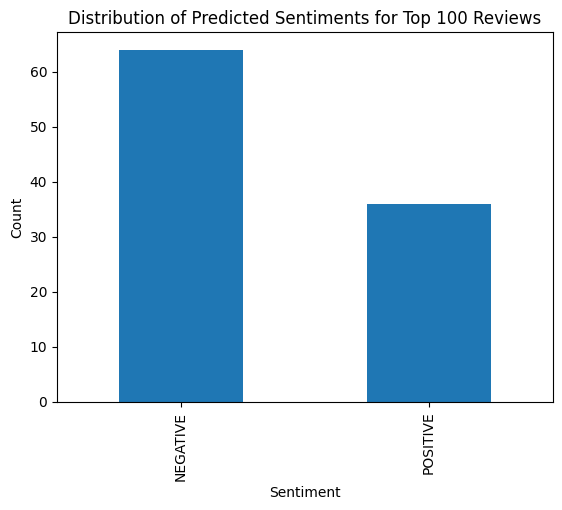

In [32]:
# Create a DataFrame for the top 100 reviews and their predicted sentiments
df_top_100 = pd.DataFrame({
    'review_clean': truncated_texts,
    'predicted_sentiment': sentiment_labels
})

# Plot the distribution of predicted sentiments for the top 100 reviews
df_top_100['predicted_sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Predicted Sentiments for Top 100 Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()





Preprocessing: The dataset undergoes preprocessing where each review is cleaned (HTML tags are removed, and texts are converted to lowercase) to prepare the data for sentiment analysis.

Sentiment Analysis Pipeline Initialization: A sentiment analysis pipeline is initialized using a specified pre-trained model (distilbert-base-uncased-finetuned-sst-2-english), which is designed to predict sentiments from text inputs.

Data Selection and Truncation: The top 100 cleaned reviews are selected and truncated to ensure they meet the model's input requirements.

Sentiment Prediction: The prepared texts are fed into the sentiment analysis pipeline, which predicts the sentiment (positive or negative) for each review.

Results Compilation: A new DataFrame is created to compile the cleaned and truncated reviews alongside their predicted sentiments.

Results Visualization: Finally, a bar plot is generated to visualize the distribution of predicted sentiments among the top 100 reviews, showcasing how many reviews were classified as positive or negative.

Overall, this code is a complete workflow for preprocessing text data, performing sentiment analysis using a pre-trained NLP model, and visualizing the distribution of sentiments within a dataset of movie reviews.

# Conclusion
The journey through sentiment analysis of the IMDB dataset has been both enlightening and promising. Starting with traditional machine learning models, we achieved commendable performance, as evidenced by the high accuracy and balanced precision, recall, and F1 scores achieved by models like SVM. However, the exploration underscored a pivotal realization: the field of NLP is rapidly evolving, and with it, the tools and models at our disposal for understanding human sentiment.

Advanced models like T5, with its text-to-text transformation capability, exemplify the ongoing shift towards more sophisticated, flexible approaches to NLP tasks. These models not only promise improvements in accuracy but also offer the potential to uncover subtler nuances and deeper meanings within text, which traditional models might overlook.

As we continue to push the boundaries of sentiment analysis, our work underscores the importance of continuous exploration and adaptation in the face of advancing technology. The insights gained from the IMDB dataset are a testament to the power of NLP to bridge the gap between raw data and meaningful understanding, paving the way for future research and applications that transcend beyond movie reviews to other domains where human sentiment plays a critical role.

In conclusion, the evolution from SVM to transformer-based models in sentiment analysis marks a significant leap forward in our ability to decode the complexities of human emotion expressed through text. As we harness these advanced models, we open new doors to understanding not just movies, but the myriad ways in which language shapes our perception of the world.